In [173]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [174]:
df=pd.read_csv("/content/drive/MyDrive/air-quality-india.csv")
df

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50
...,...,...,...,...,...,...
36187,2022-06-04 11:00:00,2022,6,4,11,35.89
36188,2022-06-04 12:00:00,2022,6,4,12,33.83
36189,2022-06-04 13:00:00,2022,6,4,13,33.05
36190,2022-06-04 14:00:00,2022,6,4,14,35.29


In [175]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36192 entries, 0 to 36191
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  36192 non-null  object 
 1   Year       36192 non-null  int64  
 2   Month      36192 non-null  int64  
 3   Day        36192 non-null  int64  
 4   Hour       36192 non-null  int64  
 5   PM2.5      36192 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.7+ MB


In [176]:
df.describe().T



,count,mean,std,min,25%,50%,75%,max
Year,36192.0,2019.682278,1.345011,2017.00,2019.00,2020.00,2021.00,2022.00
Month,36192.0,6.331841,3.593321,1.00,3.00,6.00,10.00,12.00
Day,36192.0,15.716401,8.859769,1.00,8.00,16.00,23.00,31.00
Hour,36192.0,11.477840,6.925088,0.00,5.00,11.00,17.00,23.00
PM2.5,36192.0,49.308429,24.863511,7.02,28.08,45.73,64.52,245.63


In [177]:
df.groupby("Day")["Hour"].sum()

,Hour
Day,
1,13918
2,14517
3,14058
4,13785
5,13652
6,13686
7,13616
8,12996
9,13423


In [178]:
df["PM2.5"].max()

245.63

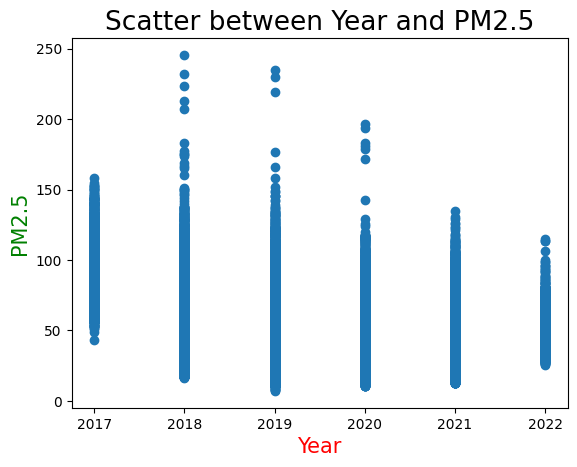

In [179]:
plt.scatter(x=df["Year"],y=df["PM2.5"])
plt.title("Scatter between Year and PM2.5",c="k",fontsize=19)
plt.xlabel("Year",fontsize=15,c="r")
plt.ylabel("PM2.5",fontsize=15,c="g")
plt.show()

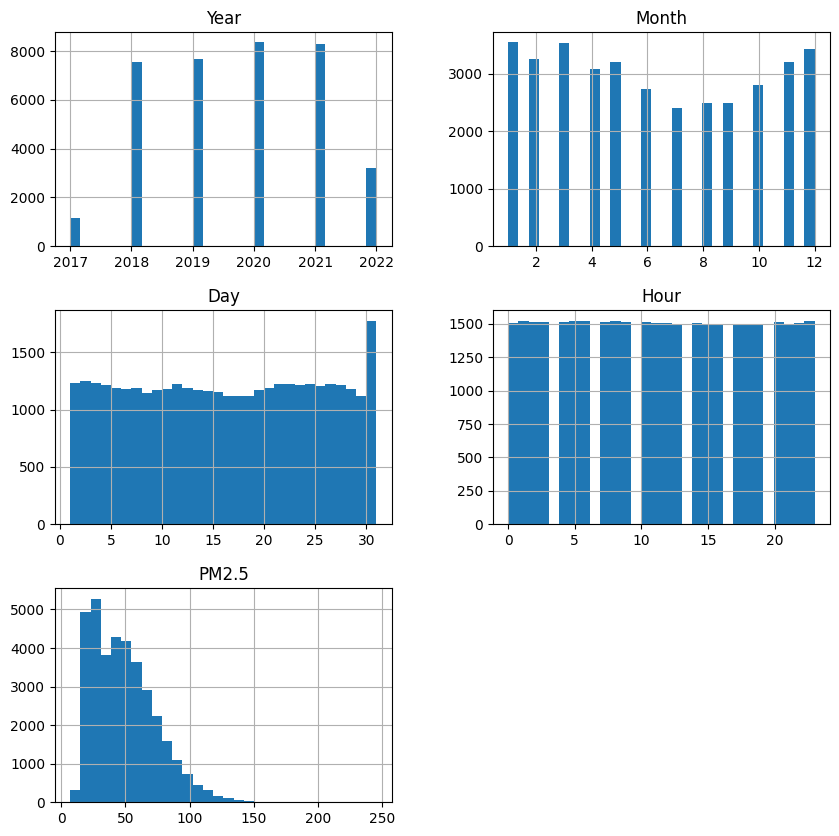

In [180]:
df.hist(bins=30,figsize=(10,10))
plt.show()

In [181]:
data=df.drop(["Timestamp","Hour"],axis=1)
data

,Year,Month,Day,PM2.5
0,2017,11,7,64.51
1,2017,11,7,69.95
2,2017,11,7,92.79
3,2017,11,7,109.66
4,2017,11,7,116.50
...,...,...,...,...
36187,2022,6,4,35.89
36188,2022,6,4,33.83
36189,2022,6,4,33.05
36190,2022,6,4,35.29


In [182]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [183]:
x

array([[2017,   11,    7],
       [2017,   11,    7],
       [2017,   11,    7],
       ...,
       [2022,    6,    4],
       [2022,    6,    4],
       [2022,    6,    4]])

In [184]:
y

array([64.51, 69.95, 92.79, ..., 33.05, 35.29, 40.67])

In [185]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2,shuffle=True)

In [186]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (28953, 3)
x_test shape (7239, 3)
y_train shape (28953,)
y_test shape (7239,)


In [187]:
x_train


array([[2018,    4,   27],
       [2021,   12,    9],
       [2018,    3,    1],
       ...,
       [2019,    4,   22],
       [2017,   12,   19],
       [2019,   12,    8]])

In [188]:
x_test


array([[2020,   11,   23],
       [2019,   10,   28],
       [2018,    1,    6],
       ...,
       [2019,   12,   22],
       [2021,    6,   10],
       [2018,    7,    7]])

In [189]:
y_train


array([ 41.89,  54.65,  75.87, ...,  46.79, 104.61,  52.97])

In [190]:
y_test

array([77.44, 38.7 , 96.36, ..., 73.98, 23.57, 30.95])

In [191]:
rf=RandomForestRegressor(max_depth=7,n_estimators=9,random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=7, n_estimators=9, random_state=42)

In [192]:
rf.score(x_train,y_train)

0.8111365835435783

In [153]:
mse_score_rf=cross_val_score(estimator=rf,X=x_train,y=y_train,cv=6,n_jobs=4,scoring="neg_mean_squared_error")

mse_score_rf=-1*mse_score_rf
mse_score_rf

array([123.73561131, 110.13073008, 127.78779681, 118.3160375 ,
       129.50103439, 113.04188085])

In [154]:
y_pred_rf=cross_val_predict(estimator=rf,X=x_train,y=y_train,cv=6,n_jobs=5,method="predict")

y_pred_rf

array([ 53.06821582,  62.63944195,  65.26642113, ...,  41.87429783,
       103.75141997,  72.51718592])

In [155]:
mse_rf=mean_squared_error(y_train,y_pred_rf)
mse_rf

120.41886222319539

In [156]:
rmse_rf=np.sqrt(mse_rf)
rmse_rf

np.float64(10.973552853255658)

In [157]:
rf_accuracy=rf.score(x_test,y_test)
rf_accuracy

0.7948922888368961

In [158]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [159]:
lr.score(x_train,y_train)

0.052547167976160214

In [160]:
mse_score_lr=cross_val_score(estimator=lr,X=x_train,y=y_train,cv=5,n_jobs=3,scoring="neg_mean_squared_error")
mse_score_lr= 1*mse_score_lr
mse_score_lr

array([-599.1839281 , -579.84330337, -586.95588474, -591.53602345,
       -574.09836407])

In [161]:
y_pred_lr=cross_val_predict(estimator=lr,X=x_train,y=y_train,cv=9,n_jobs=8)

y_pred_lr


array([57.20714696, 41.71398147, 58.72478763, ..., 53.01650778,
       58.98848881, 50.72302846])

In [162]:
mse_lr=mean_squared_error(y_train,y_pred_lr)
mse_lr

586.3846599432944

In [163]:
rmse_lr=np.sqrt(mse_lr)
rmse_lr

np.float64(24.215380648325443)

In [164]:
lr_accuracy=lr.score(x_test,y_test)
lr_accuracy

0.04769455602399797

In [165]:
dt = DecisionTreeRegressor(max_depth=9,random_state=42)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=9, random_state=42)

In [166]:
dt.score(x_train,y_train)

0.8375470809822654

In [167]:
y_pred_dt=cross_val_predict(estimator=dt,X=x_train,y=y_train,cv=9,n_jobs=8)

y_pred_dt


array([ 49.48015385,  54.39771084,  66.01375   , ...,  39.87334975,
       100.70066667,  74.65099644])

In [168]:
mse_dt=mean_squared_error(y_train,y_pred_dt)
mse_dt

108.26657433751706

In [169]:
rmse_dt=np.sqrt(mse_dt)
rmse_dt

np.float64(10.405122504685712)

In [170]:
dt_accuracy=dt.score(x_test,y_test)
dt_accuracy

0.8177059843913619

In [171]:
print("The accuracy of the models are listed below ")
print(f"The accuracy of Random Forest Regressor is {rf_accuracy}")
print(f"The accuracy of Linear Regression is {lr_accuracy}")
print(f"The accuracy of Decision Tree Regessor is {dt_accuracy}")

The accuracy of the models are listed below 
The accuracy of Random Forest Regressor is 0.7948922888368961
The accuracy of Linear Regression is 0.04769455602399797
The accuracy of Decision Tree Regessor is 0.8177059843913619


In [172]:
print("The Decision Tree Regressor achieved the highest R² score, indicating the best predictive performance. Random Forest also performed well, while Linear Regression showed very poor performance, suggesting that the data has a non-linear relationship")

The Decision Tree Regressor achieved the highest R² score, indicating the best predictive performance. Random Forest also performed well, while Linear Regression showed very poor performance, suggesting that the data has a non-linear relationship
